In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
import warnings
import warnings
warnings.filterwarnings('ignore')

E:\python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dch=pd.read_csv("customerchurn.csv")

In [3]:
dch.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
dch.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
dch.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [6]:
dch.shape

(3333, 21)

In [7]:
dch['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

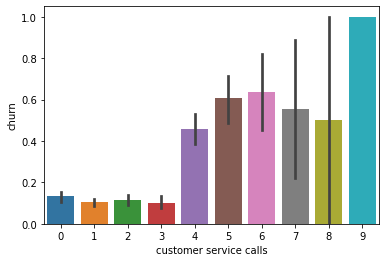

In [8]:
sns.barplot(x="customer service calls",y="churn",data=dch)


In [9]:
dch['phone number'].size

3333

In [10]:
dch.drop('phone number',axis=1,inplace=True)

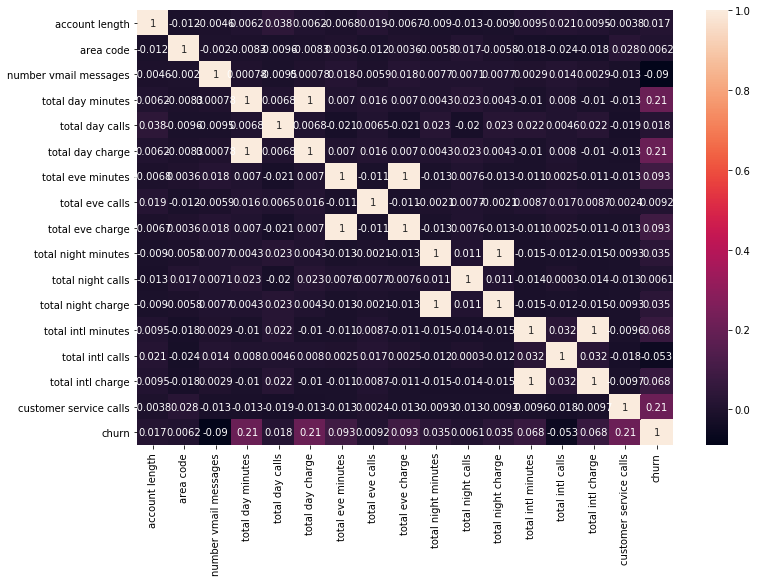

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(dch.corr(),annot=True)

In [12]:
le=LabelEncoder()
for col in dch.columns:
    if dch[col].dtype==bool or dch[col].dtype==object:
        dch[col]=le.fit_transform(dch[col])

In [13]:
dch.dtypes

state                       int32
account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [14]:
dch.skew()

state                    -0.064618
account length            0.096606
area code                 1.126823
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [15]:
x=dch.iloc[:,:-1]
x

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [16]:
#using standard scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [17]:
y=dch.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [18]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 40 is 0.8725637181409296
accuracy_score: 41 is 0.8470764617691154
accuracy_score: 42 is 0.856071964017991
accuracy_score: 43 is 0.8770614692653673
accuracy_score: 44 is 0.8680659670164917
accuracy_score: 45 is 0.856071964017991
accuracy_score: 46 is 0.8725637181409296
accuracy_score: 47 is 0.8740629685157422
accuracy_score: 48 is 0.863568215892054
accuracy_score: 49 is 0.8650674662668666
accuracy_score: 50 is 0.8470764617691154
accuracy_score: 51 is 0.8605697151424287
accuracy_score: 52 is 0.856071964017991
accuracy_score: 53 is 0.8515742128935532
accuracy_score: 54 is 0.8500749625187406
accuracy_score: 55 is 0.8545727136431784
accuracy_score: 56 is 0.8710644677661169
accuracy_score: 57 is 0.8620689655172413
accuracy_score: 58 is 0.8395802098950524
accuracy_score: 59 is 0.863568215892054
accuracy_score: 60 is 0.8605697151424287
accuracy_score: 61 is 0.8500749625187406
accuracy_score: 62 is 0.8605697151424287
accuracy_score: 63 is 0.8455772113943029
accuracy_score: 64 is

In [19]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

In [20]:
KNN=KNeighborsClassifier(n_neighbors=6)
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=6)
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100,random_state=83)
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))

In [21]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc auc score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
  


************************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


accuracy_score= 0.9115442278860569


Cross_val_score= 0.8817913722105338


roc auc score= 0.6368328699694635


Classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       593
           1       0.78      0.28      0.42        74

    accuracy                           0.91       667
   macro avg       0.85      0.64      0.68       667
weighted avg       0.90      0.91      0.89       667



[[587   6]
 [ 53  21]]


************************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_st

In [22]:
#Checking all classifiers cross val score and roc_auc_score
result=pd.DataFrame({'Model': Model, 'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,91.154423,88.179137,63.683287
1,SVC,93.253373,91.929834,76.099540
2,LogisticRegression,88.455772,86.048174,61.574222
3,DecisionTreeClassifier,90.704648,91.899534,84.127888
4,GaussianNB,87.106447,86.469404,75.599335
5,RandomForestClassifier,97.001499,95.350290,91.217356


In [23]:
joblib.dump(rf,'customerchurn.csv')

['customerchurn.csv']

In [24]:
model=joblib.load('customerchurn.csv')
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
Conclusion:
#As the phone number column and dataset has same shape and i found that all are unique values in that column so i dropped the column
#It is always good to input Standard scaled data to the model  i have used standard scaling technique to the data
#As per analysis of models, RandomForestClassifier is the best model for this dataset as it having high accuracy score and cross val score and roc_auc_score